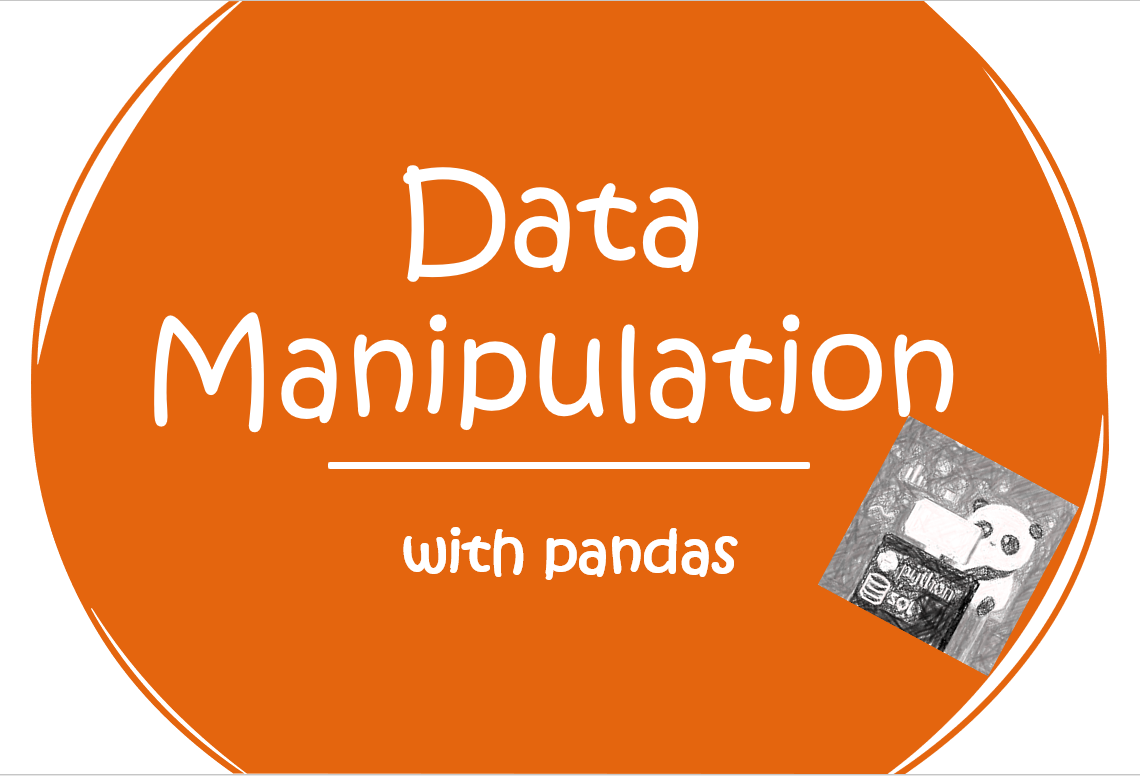

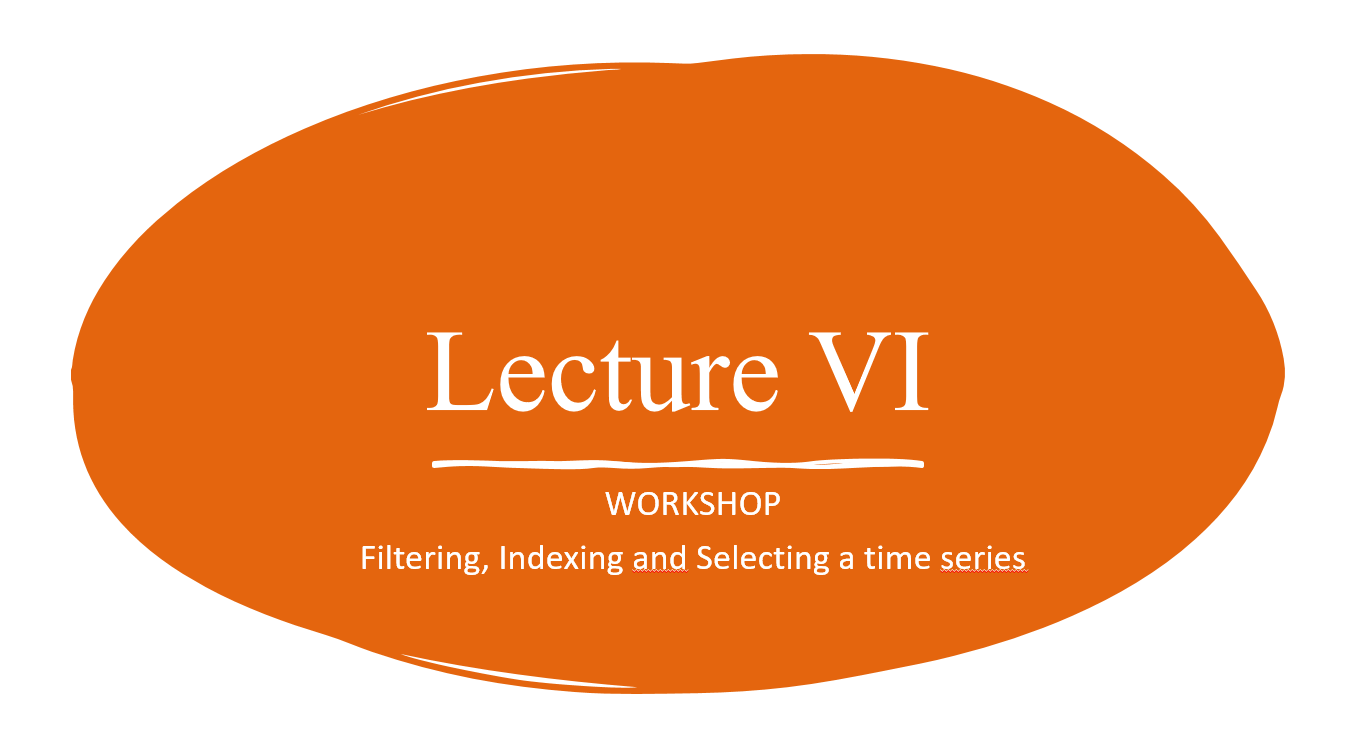

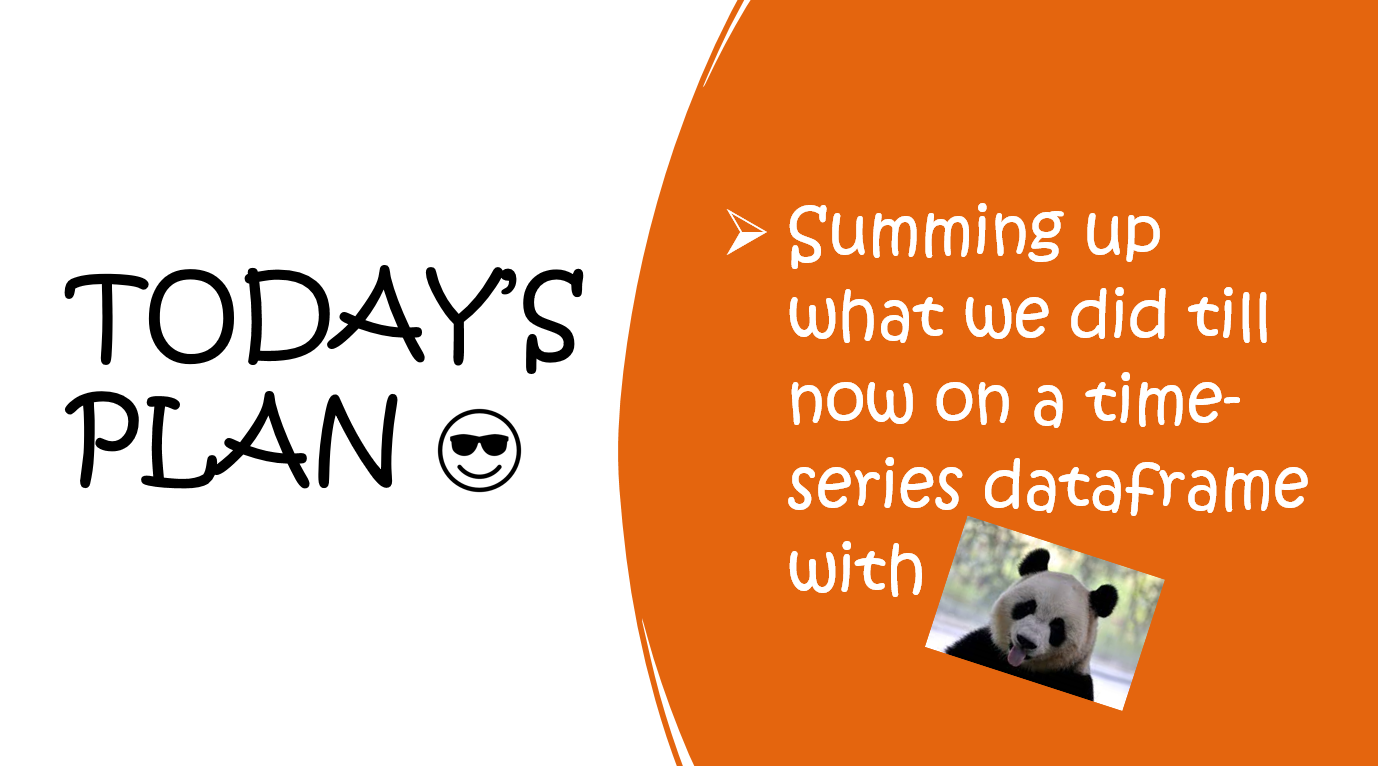

## <font color= 'Green'> 1- Import Libraries </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from zipfile import ZipFile
import os

## <font color= 'Green'> 2- Extract the Data </font>

## <font color= 'Green'> 3- Read the file </font>

In [2]:
csv_path = "jena_climate_2009_2016.csv"
df =pd.read_csv(csv_path)

## <font color= 'Green'> 4- Understanding Data </font>

In [3]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [7]:
df['wd (deg)']

Date Time
01.01.2009 00:10:00    152.3
01.01.2009 00:20:00    136.1
01.01.2009 00:30:00    171.6
01.01.2009 00:40:00    198.0
01.01.2009 00:50:00    214.3
                       ...  
31.12.2016 23:20:00    240.0
31.12.2016 23:30:00    234.3
31.12.2016 23:40:00    215.2
31.12.2016 23:50:00    225.8
01.01.2017 00:00:00    184.9
Name: wd (deg), Length: 420551, dtype: float64

In [4]:
df.columns.tolist()[1:]

['p (mbar)',
 'T (degC)',
 'Tpot (K)',
 'Tdew (degC)',
 'rh (%)',
 'VPmax (mbar)',
 'VPact (mbar)',
 'VPdef (mbar)',
 'sh (g/kg)',
 'H2OC (mmol/mol)',
 'rho (g/m**3)',
 'wv (m/s)',
 'max. wv (m/s)',
 'wd (deg)']

## <font color= 'Green'> 5- More visualization (EDA) </font>

In [5]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = df.columns.tolist()[1:]

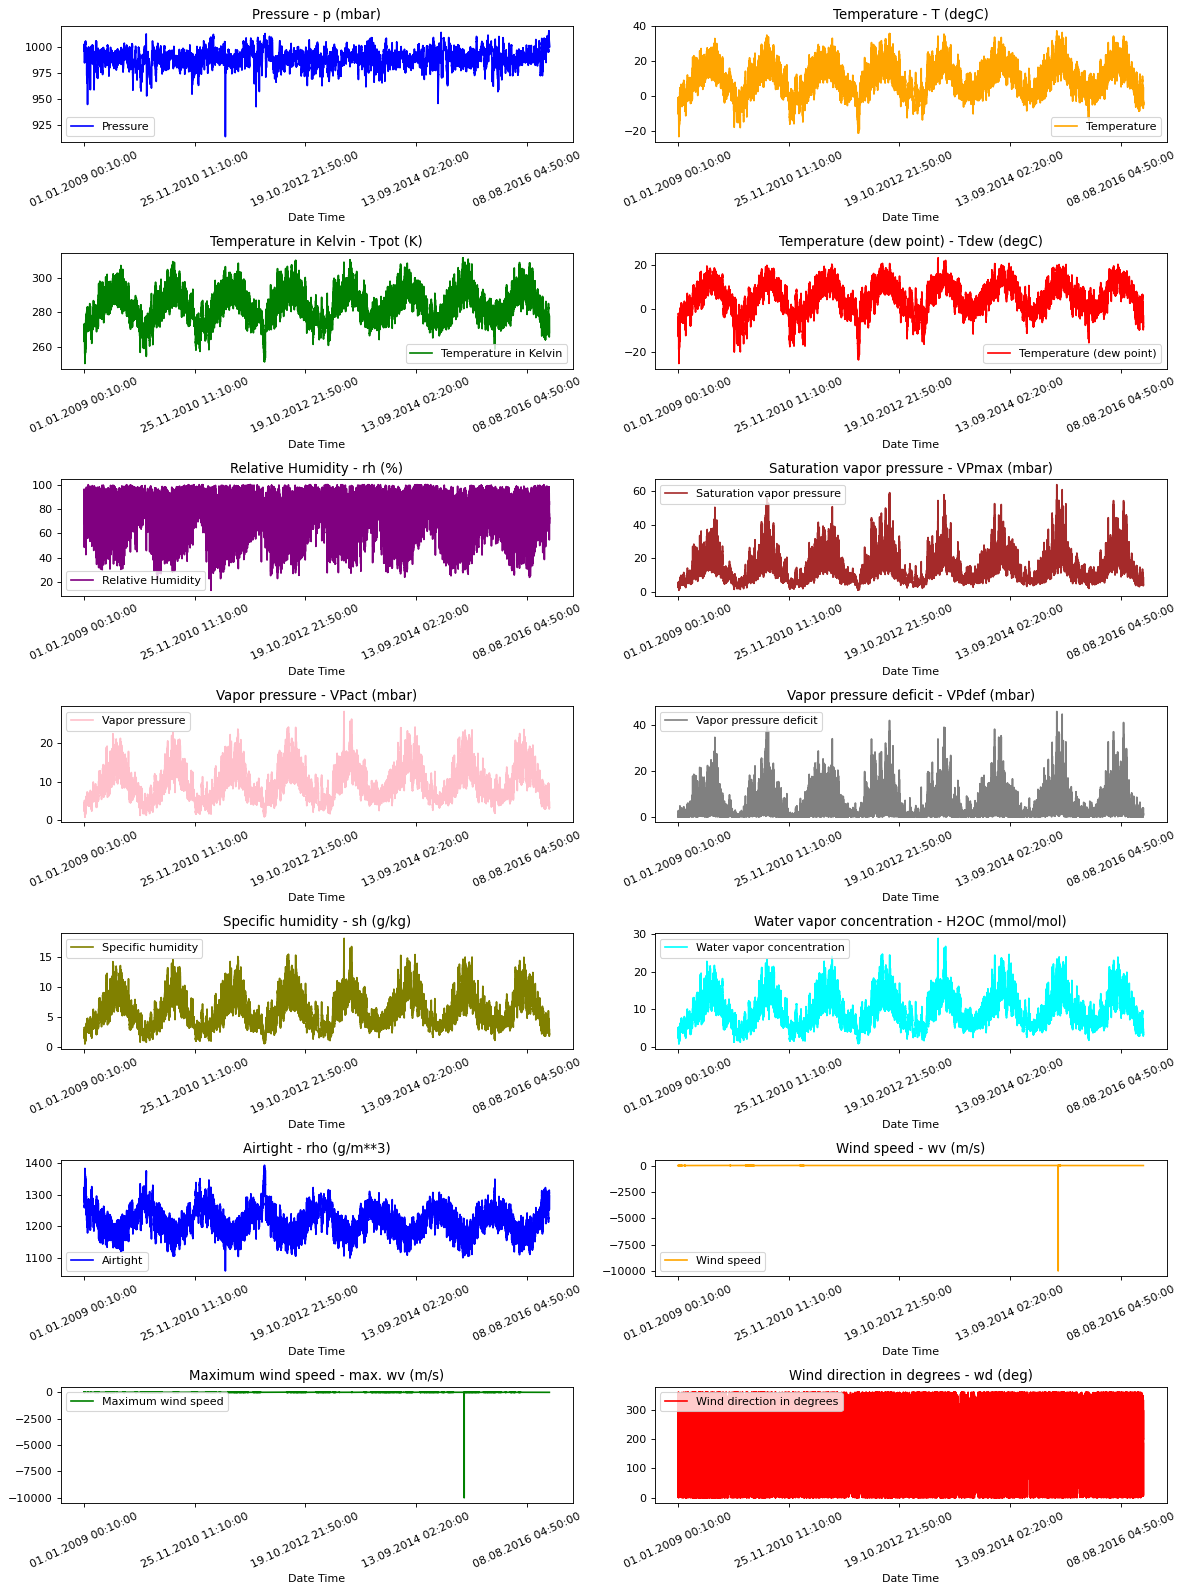

In [6]:
colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()

show_raw_visualization(df)

<Figure size 4320x3600 with 0 Axes>

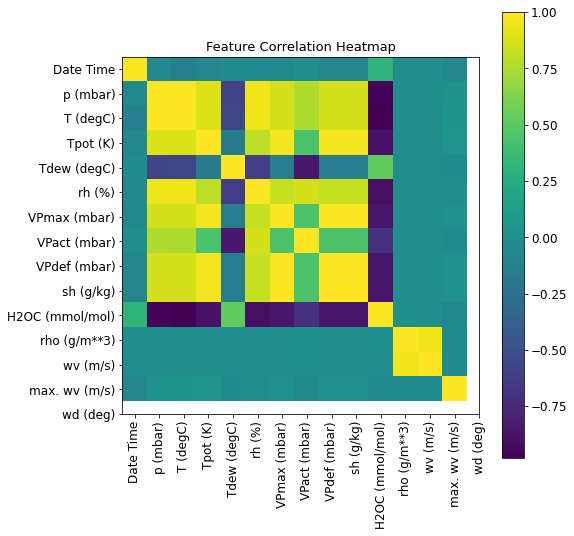

In [9]:
def show_heatmap(data):
    matfig= plt.figure(figsize=(8,8))
    plt.matshow(data.corr(),fignum=matfig.number)
    plt.xticks(range(data.shape[1]), data.columns, fontsize=12, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=12)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=12)
    plt.title("Feature Correlation Heatmap", fontsize=13)
    plt.show()

plt.figure(figsize=(60,50))
show_heatmap(df)

In [10]:
df.corr()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045375,-0.124718,-0.066755,-0.018352,-0.031546,-0.054370,-0.003401,-0.069762,-0.069804,0.307640,-0.005701,-0.007760,-0.063258
T (degC),-0.045375,1.000000,0.996827,0.895708,-0.572416,0.951113,0.867673,0.761744,0.866755,0.867177,-0.963410,-0.004689,-0.002871,0.038732
Tpot (K),-0.124718,0.996827,1.000000,0.894911,-0.567127,0.947293,0.866205,0.756962,0.866533,0.866955,-0.981345,-0.004195,-0.002224,0.043599
Tdew (degC),-0.066755,0.895708,0.894911,1.000000,-0.156615,0.799271,0.968344,0.435752,0.967599,0.968044,-0.885232,-0.008718,-0.009091,0.049877
rh (%),-0.018352,-0.572416,-0.567127,-0.156615,1.000000,-0.615842,-0.151494,-0.843835,-0.150841,-0.150969,0.514282,-0.005020,-0.009921,-0.015912
VPmax (mbar),-0.031546,0.951113,0.947293,0.799271,-0.615842,1.000000,0.824865,0.875588,0.824460,0.824493,-0.901536,-0.004018,-0.002213,-0.009583
VPact (mbar),-0.054370,0.867673,0.866205,0.968344,-0.151494,0.824865,1.000000,0.449154,0.999851,0.999856,-0.850241,-0.009600,-0.010316,0.018418
VPdef (mbar),-0.003401,0.761744,0.756962,0.435752,-0.843835,0.875588,0.449154,1.000000,0.448641,0.448689,-0.698290,0.001852,0.005317,-0.030881
sh (g/kg),-0.069762,0.866755,0.866533,0.967599,-0.150841,0.824460,0.999851,0.448641,1.000000,0.999997,-0.853325,-0.009479,-0.010163,0.019376
H2OC (mmol/mol),-0.069804,0.867177,0.866955,0.968044,-0.150969,0.824493,0.999856,0.448689,0.999997,1.000000,-0.853769,-0.009477,-0.010158,0.019607


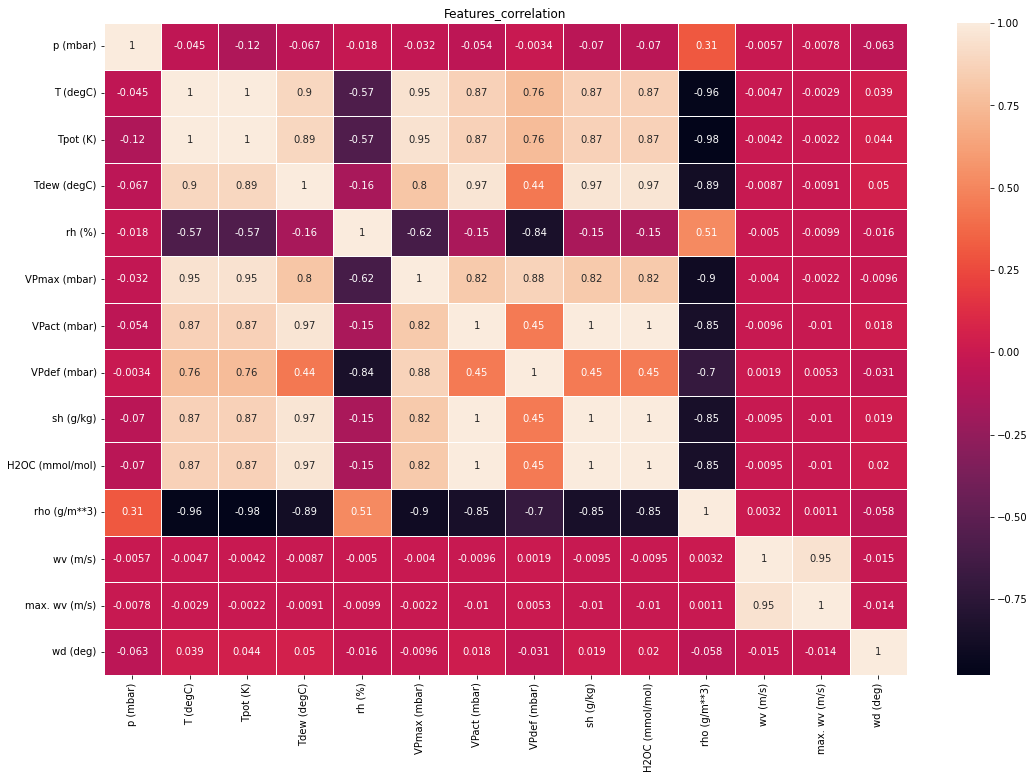

In [11]:
import seaborn as sns
plt.figure(figsize=(18,12))
heat_mat = sns.heatmap(df.corr(), linewidth = 1,annot=True)
plt.title("Features_correlation")
plt.show()

In [12]:
cor_in_range=df.corr()

In [35]:
cor_in_range_va=cor_in_range.where((abs(cor_in_range.values>=0.1)) & (abs(cor_in_range.values<=0.85)))

In [110]:
## the length of columns of corr=14
## So if a correlation frame contains 14 null values then it means that we are not in the desired range! That's why
## we need to exclude those columns
cor_in_range_va.isnull().sum()!=len(cor_in_range.columns)
### It seems that the Irechukwu's work is correct

p (mbar)            True
T (degC)            True
Tpot (K)            True
Tdew (degC)         True
rh (%)              True
VPmax (mbar)        True
VPact (mbar)        True
VPdef (mbar)        True
sh (g/kg)           True
H2OC (mmol/mol)     True
rho (g/m**3)        True
wv (m/s)           False
max. wv (m/s)      False
wd (deg)           False
dtype: bool

In [34]:
# Erisa's  code
def get_acceptable_columns(data):
    corr_matrix = data.corr().abs()
    acceptable_columns = corr_matrix[(corr_matrix >= 0.1) & (corr_matrix <= 0.85)].columns
    return acceptable_columns.tolist()
get_acceptable_columns(df)

['p (mbar)',
 'T (degC)',
 'Tpot (K)',
 'Tdew (degC)',
 'rh (%)',
 'VPmax (mbar)',
 'VPact (mbar)',
 'VPdef (mbar)',
 'sh (g/kg)',
 'H2OC (mmol/mol)',
 'rho (g/m**3)',
 'wv (m/s)',
 'max. wv (m/s)',
 'wd (deg)']

In [32]:
# Irechukwu's  code
def acceptable_columns(data):
    corr_matrix = data.corr().abs()
    acceptable_columns = []
    for column in corr_matrix.columns:
        for value in corr_matrix[column]:
            if value >= 0.1 and value <= 0.85:
                acceptable_columns.append(column)
                break
    return acceptable_columns

In [33]:
acceptable_columns(df)

['p (mbar)',
 'T (degC)',
 'Tpot (K)',
 'Tdew (degC)',
 'rh (%)',
 'VPmax (mbar)',
 'VPact (mbar)',
 'VPdef (mbar)',
 'sh (g/kg)',
 'H2OC (mmol/mol)',
 'rho (g/m**3)']

## <font color= 'Green'> 6- Setting Index & Filtering Data </font>

In [15]:
df_indexed = df.set_index('Date Time')

In [16]:
df_indexed.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [19]:
df.dtypes

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

In [18]:
df_indexed.dtypes

p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

In [20]:
df_indexed_2014 = df_indexed[df_indexed.index.str.contains('2014')==True]

In [22]:
df_indexed_2014.sample(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
05.04.2014 06:20:00,985.61,8.36,282.69,6.61,88.70,11.00,9.76,1.24,6.18,9.90,1215.05,0.56,0.88,86.80
10.12.2014 04:00:00,998.25,-1.27,272.03,-3.02,87.80,5.57,4.89,0.68,3.05,4.90,1276.62,2.70,3.85,192.10
02.11.2014 23:00:00,986.09,11.00,285.30,9.14,88.30,13.14,11.61,1.54,7.35,11.77,1203.50,2.48,3.20,188.50
10.08.2014 20:10:00,979.52,25.72,300.65,15.97,54.89,33.11,18.18,14.94,11.62,18.56,1133.67,2.00,3.52,183.40
29.04.2014 03:50:00,984.94,9.45,283.84,8.83,95.90,11.85,11.36,0.49,7.21,11.54,1208.80,1.10,1.92,34.07


In [24]:
df_indexed_2014.sort_values('T (degC)', ascending=False)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
08.06.2014 17:20:00,990.36,33.74,307.75,12.23,27.16,52.49,14.26,38.23,9.00,14.40,1118.03,3.32,4.30,189.30
08.06.2014 17:10:00,990.34,33.73,307.74,12.14,27.02,52.46,14.18,38.29,8.95,14.31,1118.08,4.30,6.34,176.80
08.06.2014 15:50:00,990.83,33.73,307.70,12.81,28.24,52.46,14.82,37.65,9.35,14.95,1118.36,3.05,5.44,181.10
08.06.2014 17:40:00,990.35,33.72,307.73,12.06,26.89,52.43,14.10,38.33,8.90,14.24,1118.16,2.77,4.48,180.40
08.06.2014 16:00:00,990.78,33.68,307.65,12.57,27.87,52.32,14.58,37.74,9.20,14.72,1118.59,3.83,6.68,185.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26.01.2014 11:10:00,984.38,-9.85,264.50,-11.56,87.20,2.89,2.52,0.37,1.59,2.56,1301.08,2.90,3.93,44.42
26.01.2014 10:00:00,984.14,-9.90,264.47,-11.51,87.90,2.87,2.53,0.35,1.60,2.57,1301.01,2.97,4.37,36.98
26.01.2014 10:30:00,984.22,-9.92,264.44,-11.54,87.80,2.87,2.52,0.35,1.59,2.56,1301.22,3.04,3.85,34.60


In [25]:
df_indexed_2014[df_indexed_2014['T (degC)']==df_indexed_2014['T (degC)'].max()]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
08.06.2014 17:20:00,990.36,33.74,307.75,12.23,27.16,52.49,14.26,38.23,9.0,14.4,1118.03,3.32,4.3,189.3


In [26]:
## What is the hottest year on mean-temp? 
year=[]
mean_tem_deg=[]
for i in range(2009,2017):
    year.append(i)
    mean_tem_deg.append(df_indexed[df_indexed.index.str.contains(str(i))==True]['T (degC)'].mean())

In [27]:
a=list(zip(year, mean_tem_deg))

In [28]:
a

[(2009, 8.830283501721938),
 (2010, 7.504652208560987),
 (2011, 9.303914383561743),
 (2012, 9.655535253491312),
 (2013, 9.09397838619458),
 (2014, 10.718917127281836),
 (2015, 10.511207382039588),
 (2016, 9.988671233663014)]

In [29]:
# to get tuple info. of maximum value tuple
# using max() + itemgetter()
from operator import itemgetter
max(a, key = itemgetter(1))

(2014, 10.718917127281836)

In [30]:
a=list(zip(year, mean_tem_deg))
# using max() + lambda
# to get tuple info. of maximum value tuple
max(a, key = lambda i : i[1])

(2014, 10.718917127281836)

In [ ]:
# What is the hottest month of the hottest year (2014)? (without using groupby)
# Ans: August

In [39]:
df_indexed_2014.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2014 00:00:00,987.70,-0.12,274.01,-4.26,73.5,6.06,4.45,1.60,2.81,4.51,1258.01,2.66,3.57,202.9
01.01.2014 00:10:00,987.54,-0.11,274.03,-4.33,73.1,6.06,4.43,1.63,2.79,4.48,1257.80,2.25,3.91,204.6
01.01.2014 00:20:00,987.39,-0.07,274.08,-4.38,72.6,6.08,4.41,1.66,2.78,4.47,1257.42,2.31,3.16,199.4
01.01.2014 00:30:00,987.18,-0.07,274.10,-4.34,72.8,6.08,4.42,1.65,2.79,4.48,1257.13,2.58,3.67,190.5
01.01.2014 00:40:00,987.18,0.20,274.37,-4.29,71.7,6.20,4.44,1.75,2.80,4.50,1255.91,2.59,4.13,178.9


In [42]:
df_indexed_2014.index = pd.to_datetime(df_indexed_2014.index)

In [43]:
df_indexed_2014['month'] = df_indexed_2014.index.month

C:\Users\silao\AppData\Local\Temp\ipykernel_15208\24251950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indexed_2014['month'] = df_indexed_2014.index.month


In [45]:
df_indexed_2014.sample(8)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),month
Date Time,,,,,,,,,,,,,,,
2014-01-07 16:40:00,990.60,21.00,294.96,5.17,35.46,24.91,8.83,16.08,5.57,8.92,1169.17,1.54,3.92,303.3,1
2014-10-04 19:20:00,994.15,8.68,282.31,7.27,90.80,11.25,10.21,1.03,6.41,10.27,1224.03,1.04,1.48,244.2,10
2014-03-21 10:40:00,982.29,17.96,292.61,6.66,47.49,20.62,9.79,10.83,6.22,9.97,1171.00,7.87,12.73,208.4,3
2014-12-24 07:50:00,989.26,6.59,280.61,1.84,71.60,9.75,6.98,2.77,4.40,7.05,1228.61,3.20,4.49,219.6,12
2014-01-15 09:20:00,984.63,2.29,276.67,1.69,95.80,7.21,6.90,0.30,4.37,7.01,1241.96,0.68,1.24,184.5,1
2014-07-27 12:10:00,987.93,26.38,300.58,17.63,58.67,34.43,20.20,14.23,12.82,20.45,1140.07,1.47,2.80,274.3,7
2014-09-13 08:40:00,994.39,14.27,287.89,14.13,99.10,16.29,16.14,0.15,10.16,16.24,1197.79,0.86,1.88,183.2,9
2014-10-25 13:10:00,993.51,11.75,285.44,6.96,72.40,13.81,10.00,3.81,6.29,10.07,1210.15,2.62,3.72,149.6,10


In [51]:
df_indexed_2014.sort_values('T (degC)', ascending=False).iloc[0]['month']

8.0

In [ ]:
# What is the coldest day of the hottest month in 2014? (without using groupby)
# Ans: 20 (hottest)

In [ ]:
# At what time did the coldest temp? (without using groupby)
# Ans: 14:50 (hottest)

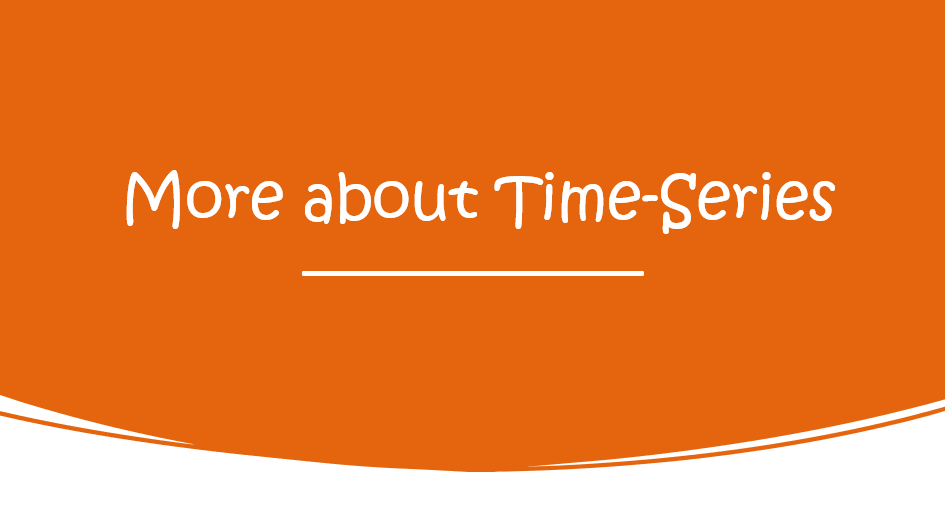

The data obtained from "https://fred.stlouisfed.org/series/IPG2211A2N"

## <font color= 'Green'> 1- Import libraries </font>

In [52]:
# Importing Libraries
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from numpy import mean
from sklearn.metrics import mean_squared_error
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing
from matplotlib import pyplot
import itertools

In [53]:
el = pd.read_csv('IPG2211A2N.csv')

In [54]:
el.head()

,DATE,IPG2211A2N
0,1939-01-01,3.3298
1,1939-02-01,3.3552
2,1939-03-01,3.4315
3,1939-04-01,3.4569
4,1939-05-01,3.4569


In [55]:
el=el.rename(columns={'DATE': 'Date', 'IPG2211A2N':'Energy Consumption'})

In [57]:
el.isna().sum()

Date                  0
Energy Consumption    0
dtype: int64

In [60]:
el.dtypes

Date                  datetime64[ns]
Energy Consumption           float64
dtype: object

In [59]:
el['Date'] = pd.to_datetime(el['Date'])

In [61]:
el=el.set_index('Date')

In [62]:
el.head()

,Energy Consumption
Date,
1939-01-01,3.3298
1939-02-01,3.3552
1939-03-01,3.4315
1939-04-01,3.4569
1939-05-01,3.4569


Text(0, 0.5, 'Consumption')

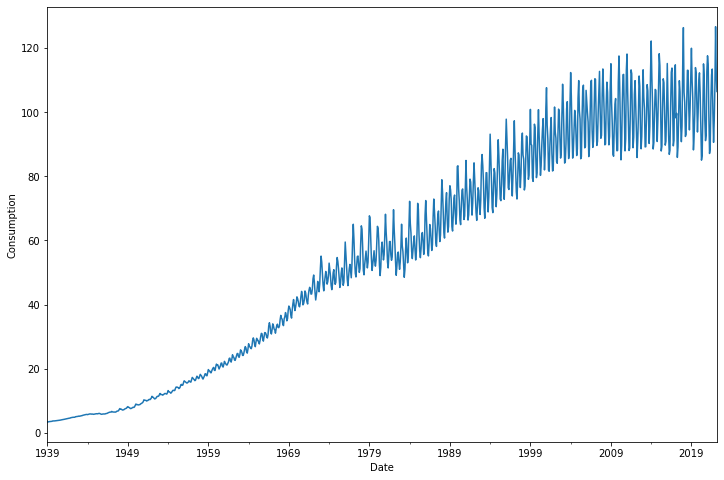

In [63]:
plt.figure(figsize=(12,8))
el['Energy Consumption'].plot()
plt.ylabel('Consumption')

In [64]:
from pylab import rcParams
# For more details (trend, seasonality, Resid)
rcParams['figure.figsize'] = 18,8
y_decompose = seasonal_decompose(el['Energy Consumption'], model='additive') 
# additive (linear) vs multiplicative (non-linear)

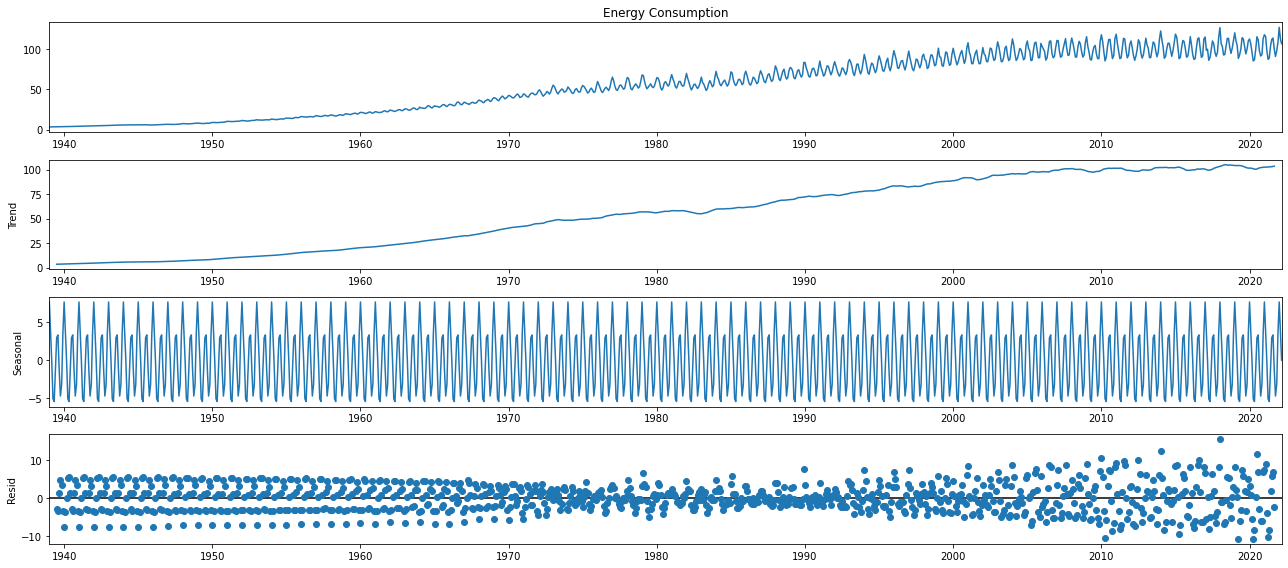

In [66]:
y_decompose_plot=y_decompose.plot()

In [67]:
df = el.copy()
df['Mov_Avg_12']= df['Energy Consumption'].rolling(window=12).mean().shift(1)

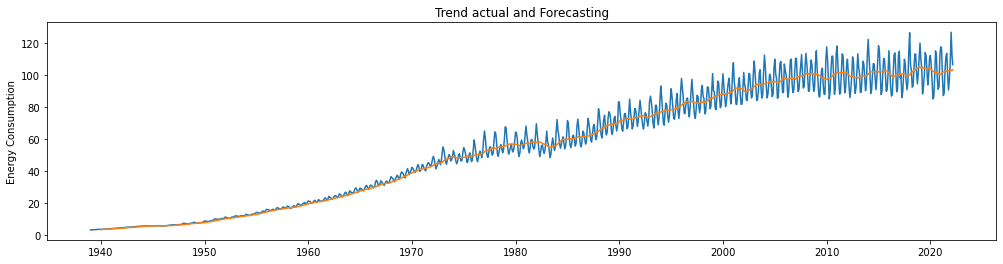

In [69]:
plt.figure(figsize=(17,4))
plt.ylabel('Energy Consumption')
plt.title('Trend actual and Forecasting')
plt.plot(df[['Energy Consumption','Mov_Avg_12']])

In [85]:
el.tail()

,Energy Consumption
Date,
2021-11-01,97.5253
2021-12-01,108.1161
2022-01-01,126.6999
2022-02-01,112.0412
2022-03-01,106.4788


In [86]:
el[el.index.year>=2017].shape

(63, 1)

In [87]:
len(el)-63

936

In [88]:
import numpy as np
from sklearn.metrics import mean_squared_error
errror=np.sqrt(mean_squared_error(df['Energy Consumption'][936:].values,df['Mov_Avg_12'][936:].values))
#errror_per=np.sqrt(mean_squared_error(df['Energy Consumption'][928:].values,df['Mov_Avg_12'][928:].values)/df['Energy Consumption'][928:].values)
print('5 years RMSE is:',errror)

5 years RMSE is: 10.180512108502594


### A simple Model for Time Series

The Exponential Smoothing Method removes this limitation by assigning differential weights to the past observations. Here, the weights assigned to past data decline exponentially with the most recent observations assigned higher weights. The rate at which the weights decreases is controlled by a hyperparameter also called the ‘smoothing constant’ .

Another important advantage of exponential smoothing method over simple averaging method is that the smoothing constant can be easily optimized using ‘Solver’ to minimize the mean squared errors.

Exponential Smoothing Methods are of three types :

* __Single Exponential Smoothing__ This method addresses only the level component of the time series. It uses a hyper parameter alpha which is called a smoothing constant, the value of which lies between 0 and 1. Since only one smoothing constant is used, it is called Single Exponential Smoothing. Here the forecast at time t is given as 
$$F(t) = \alpha * y(t-1) + (1-\alpha)*F(t-1)$$
* __Double Exponential Smoothing__ Models with low values of beta assume that the trend changes very slowly over time while models with larger value of beta assume that the trend is changing very rapidly. Single Exponential Smoothing method assumes the time series to be relatively stable with no trend and seasonality. However, in this case, the data exhibits strong trend and seasonality. 
* __Triple Exponential Smoothing or Holt Winters Method:__ Thus, there will be four equations — one each for level, trend, seasonality and the final equation with all the individual components.

The equations vary given the model is additive or multiplicative

In [90]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit1=ExponentialSmoothing(np.asarray(df['Energy Consumption'][:936].values), seasonal_periods=12, trend='add', seasonal='add').fit()

In [91]:
train_data=df['Energy Consumption'][:936]
test_data=df['Energy Consumption'][936:]
y_avg=test_data.copy()
y_avg['HoltWinter']=fit1.forecast(len(test_data))
rms=math.sqrt(mean_squared_error(test_data, y_avg.HoltWinter))
print(rms)

5.594969659036826


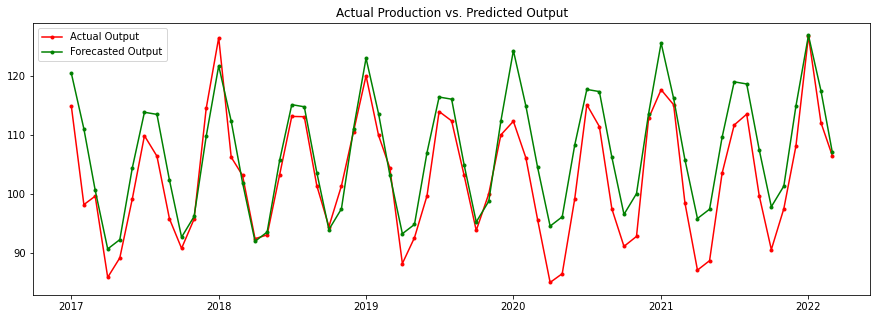

In [92]:
fig = plt.figure(figsize=(15,5));
future, = plt.plot(test_data.index, test_data, 'r.-', label='Actual Output');
predicted_future, = plt.plot(test_data.index, y_avg.HoltWinter, 'g.-', label='Forecasted Output');
plt.legend(handles=[future, predicted_future]);
plt.title('Actual Production vs. Predicted Output');